<a href="https://colab.research.google.com/github/ridhitaneja/TSF-GRIP/blob/main/TSF_GRIP_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NAME - RIDHI TANEJA **

## **GRIP - TASK 3**

# **‘Exploratory Data Analysis’ **

In [1]:
##IMPORTING LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
##reading data set
data=pd.read_csv("/content/SampleSuperstore.csv")


In [3]:
## check size of data set
data.shape

(9994, 13)

In [4]:
## checking first 5 entries
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isnull().sum()  # checking null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.nunique() #check unique value in each column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data.duplicated().sum()  # checking duplicated data 

17

In [12]:
##drop duplicated rows 
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


EXPLORATORY DATA ANALYSIS 


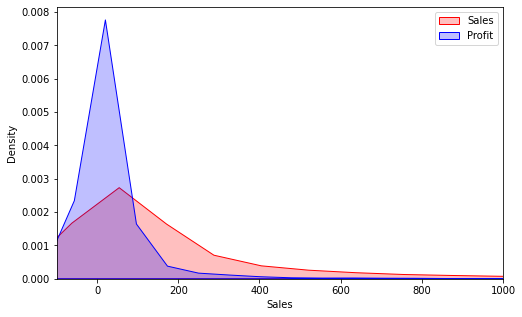

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data["Sales"], color="red", label="Sales", shade=True)
sns.kdeplot(data["Profit"], color="blue", label="Profit", shade=True)
plt.xlim([-100,1000])
plt.legend()

profit is higher than sales

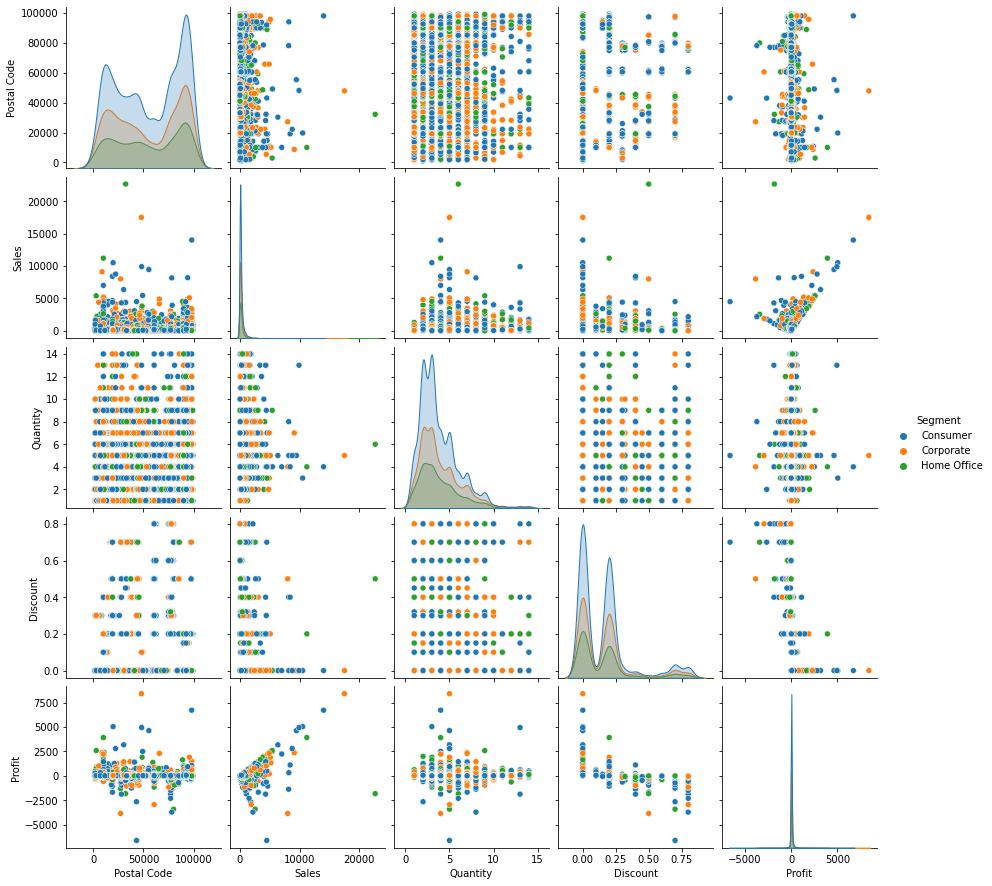

In [15]:
#pairplot based  on segment column
sns.pairplot(data,hue="Segment")

In [16]:
df=data.corr()

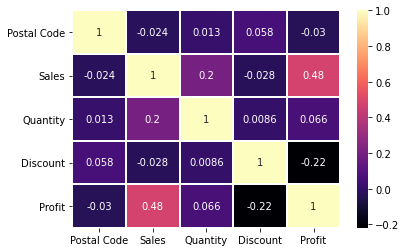

In [17]:
# heat map showing correlation between the features 
sns.heatmap(df, annot=True, cmap="magma", linewidths=1, linecolor="white")

This say that profit and sale is positively correlated 
but discount and profit are negatively

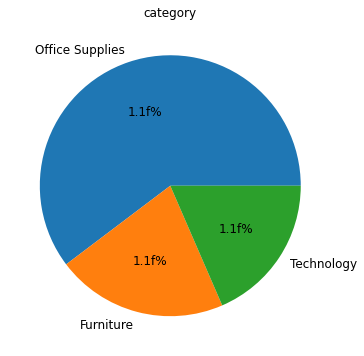

In [20]:
#pie chart for category column
plt.figure(figsize=(6,6))
textprops={"fontsize":12}
plt.title("category")
plt.pie(data["Category"].value_counts(), labels=data["Category"].value_counts().index,autopct="1.1f%%",textprops=textprops)
plt.show()

office suppliers have higher demand 

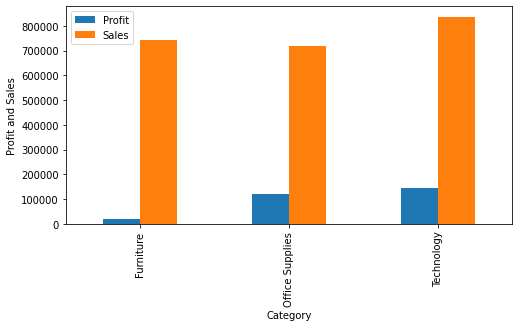

In [22]:
##bar plot
data.groupby("Category")[["Profit","Sales"]].agg(sum).plot(kind="bar",figsize=(8,4))
plt.ylabel("Profit and Sales")
plt.show()

furniture is generating less profit

Text(0.5, 1.0, 'Count of segment by category and segment')

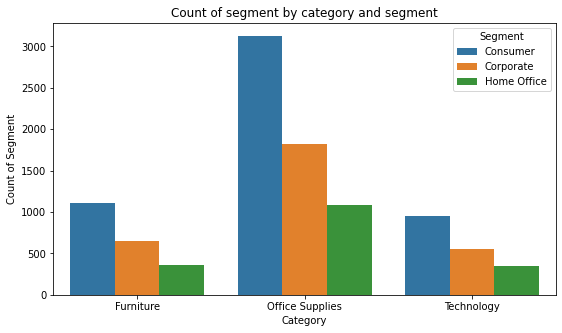

In [23]:
#count plot 
plt.figure(figsize=(9,5))
sns.countplot(x="Category", hue="Segment", data=data)
plt.ylabel("Count of Segment")
plt.title("Count of segment by category and segment")

Highest purchases is in comsumer segment whereas home office has least we need to focus on the corporate and home office as well to increase our sales and profit 

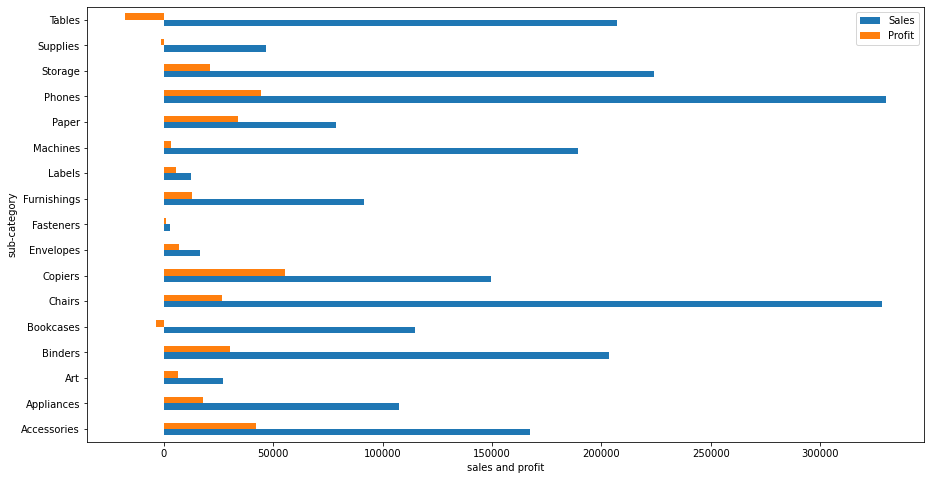

In [26]:
#sub categories 
data.groupby("Sub-Category")[['Sales','Profit']].agg(sum).plot(kind="barh",figsize=(15,8))
plt.ylabel('sub-category')
plt.xlabel('sales and profit')
plt.show()

3 weak areas tables,suppliers,bookcases

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

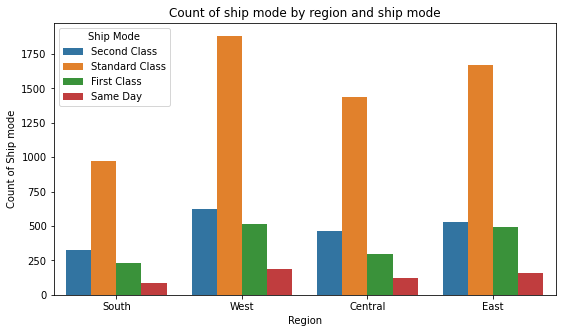

In [27]:
#count plot 
plt.figure(figsize=(9,5))
sns.countplot(x="Region", hue="Ship Mode", data=data)
plt.ylabel("Count of Ship mode")
plt.title("Count of ship mode by region and ship mode")


least sales in southern areas 
need to attract to this region

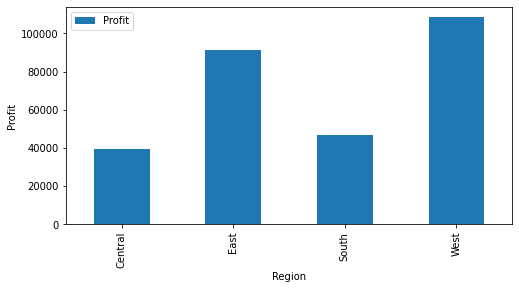

In [28]:
#check which region has least profit
data.groupby("Region")[["Profit"]].agg(sum).plot(kind="bar",figsize=(8,4))
plt.ylabel("Profit")
plt.show()

less profit by cental and south region

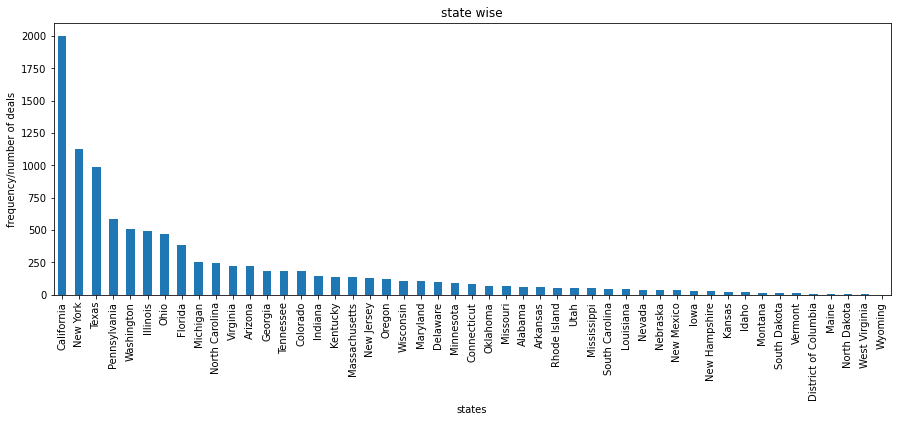

In [30]:
#bar plot state wise
data["State"].value_counts().plot(kind="bar", figsize=(15,5))
plt.ylabel("frequency/number of deals")
plt.xlabel("states")
plt.title("state wise")
plt.show()

california has highest sales but few states like north dakota,wyoming has less or no sales 
we need to increase profit by increase sales in texas and new york


### THE END